In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

# ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('camel_milk.csv')


print('Statistics')
display(round(df.describe().T, 2))

print('Dataset Info')
display(df.info())

print('missing values')
print(df.isna().sum())

Statistics


,count,mean,std,min,25%,50%,75%,max
MCGS_TIMEMS,2952.0,278.94,29.03,219.0,271.00,284.00,305.00,314.0
Box_temp,2334.0,-0.67,8.28,-41.6,-5.00,-0.10,5.10,29.0
partition_temperature,2952.0,-3.91,35.87,-50.7,-39.00,-1.55,30.10,50.8
utection,2952.0,925.70,0.00,925.7,925.70,925.70,925.70,925.7
Cold_trap,2952.0,-57.19,29.79,-92.1,-72.93,-66.70,-56.20,38.6
set,2952.0,-6.08,37.82,-50.0,-50.00,-15.00,30.00,50.0
Box_vaccum,2952.0,17372.72,37959.72,0.1,0.35,2.30,15.00,110000.0
temp_1,2952.0,-16.14,26.66,-49.5,-35.70,-22.60,-5.98,50.4
temp_2,2952.0,-12.80,29.61,-51.4,-36.40,-22.40,6.50,51.2
temp_3,2952.0,-16.42,26.27,-51.6,-35.90,-21.80,-7.68,51.0


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MCGS_TIME              2952 non-null   object 
 1   MCGS_TIMEMS            2952 non-null   float64
 2   Box_temp               2334 non-null   float64
 3   partition_temperature  2952 non-null   float64
 4   utection               2952 non-null   float64
 5   Cold_trap              2952 non-null   float64
 6   set                    2952 non-null   float64
 7   Box_vaccum             2952 non-null   float64
 8   temp_1                 2952 non-null   float64
 9   temp_2                 2952 non-null   float64
 10  temp_3                 2952 non-null   float64
 11  temp_4                 2952 non-null   float64
 12  temp_5                 2952 non-null   float64
 13  temp_6                 2952 non-null   float64
 14  experiment             2952 non-null   obje

None

missing values
MCGS_TIME                  0
MCGS_TIMEMS                0
Box_temp                 618
partition_temperature      0
utection                   0
Cold_trap                  0
set                        0
Box_vaccum                 0
temp_1                     0
temp_2                     0
temp_3                     0
temp_4                     0
temp_5                     0
temp_6                     0
experiment                 0
success                    0
max_deviation              0
thickness                  0
dtype: int64


In [3]:
df = df.fillna(df['Box_temp'].median())

In [4]:
df.isna().sum()

MCGS_TIME                0
MCGS_TIMEMS              0
Box_temp                 0
partition_temperature    0
utection                 0
Cold_trap                0
set                      0
Box_vaccum               0
temp_1                   0
temp_2                   0
temp_3                   0
temp_4                   0
temp_5                   0
temp_6                   0
experiment               0
success                  0
max_deviation            0
thickness                0
dtype: int64

In [5]:
print(df['success'].value_counts())

success
0    2677
1     275
Name: count, dtype: int64


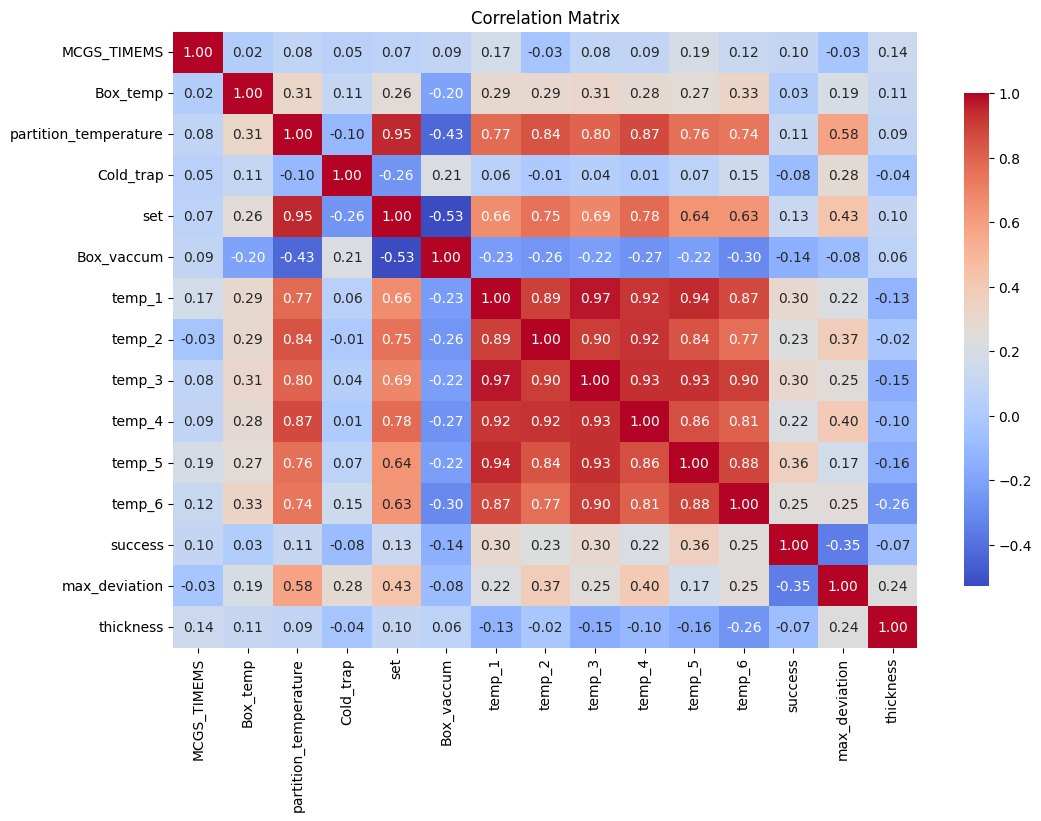

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns='utection').corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix')
plt.xticks()
plt.yticks()
plt.savefig('./figures/correlation.png', dpi=700)
plt.show()

<Axes: >

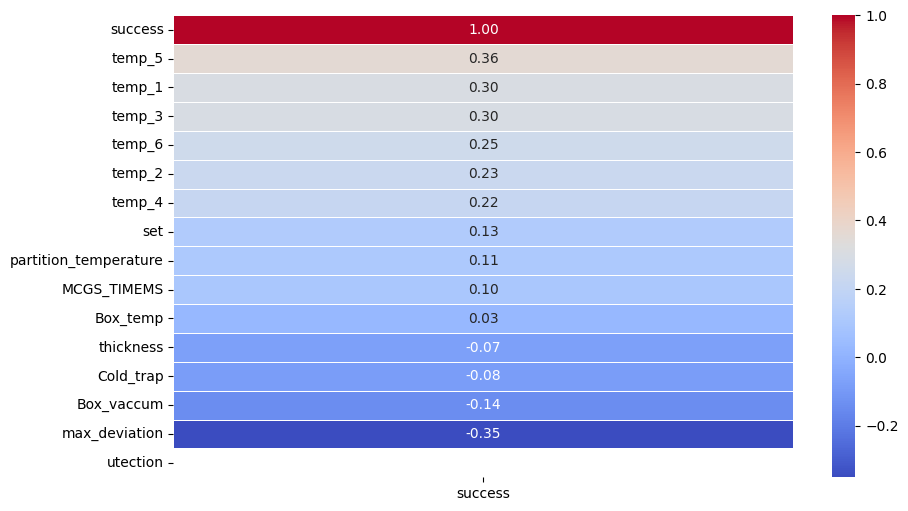

In [14]:
corr_matrix = df.corr(numeric_only=True)

corr_target = corr_matrix[['success']].sort_values(by='success', ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_target, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5,)


In [15]:
df.columns

Index(['MCGS_TIME', 'MCGS_TIMEMS', 'Box_temp', 'partition_temperature',
       'utection', 'Cold_trap', 'set', 'Box_vaccum', 'temp_1', 'temp_2',
       'temp_3', 'temp_4', 'temp_5', 'temp_6', 'experiment', 'success',
       'max_deviation', 'thickness'],
      dtype='object')

In [16]:
print(df.columns.tolist())


['MCGS_TIME', 'MCGS_TIMEMS', 'Box_temp', 'partition_temperature', 'utection', 'Cold_trap', 'set', 'Box_vaccum', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temp_6', 'experiment', 'success', 'max_deviation', 'thickness']


In [17]:
df.columns = df.columns.str.strip()  # Удаляет пробелы в начале и конце

In [18]:
if "success" not in df.columns:
    print("Столбец 'success' отсутствует! Доступные колонки:", df.columns.tolist())


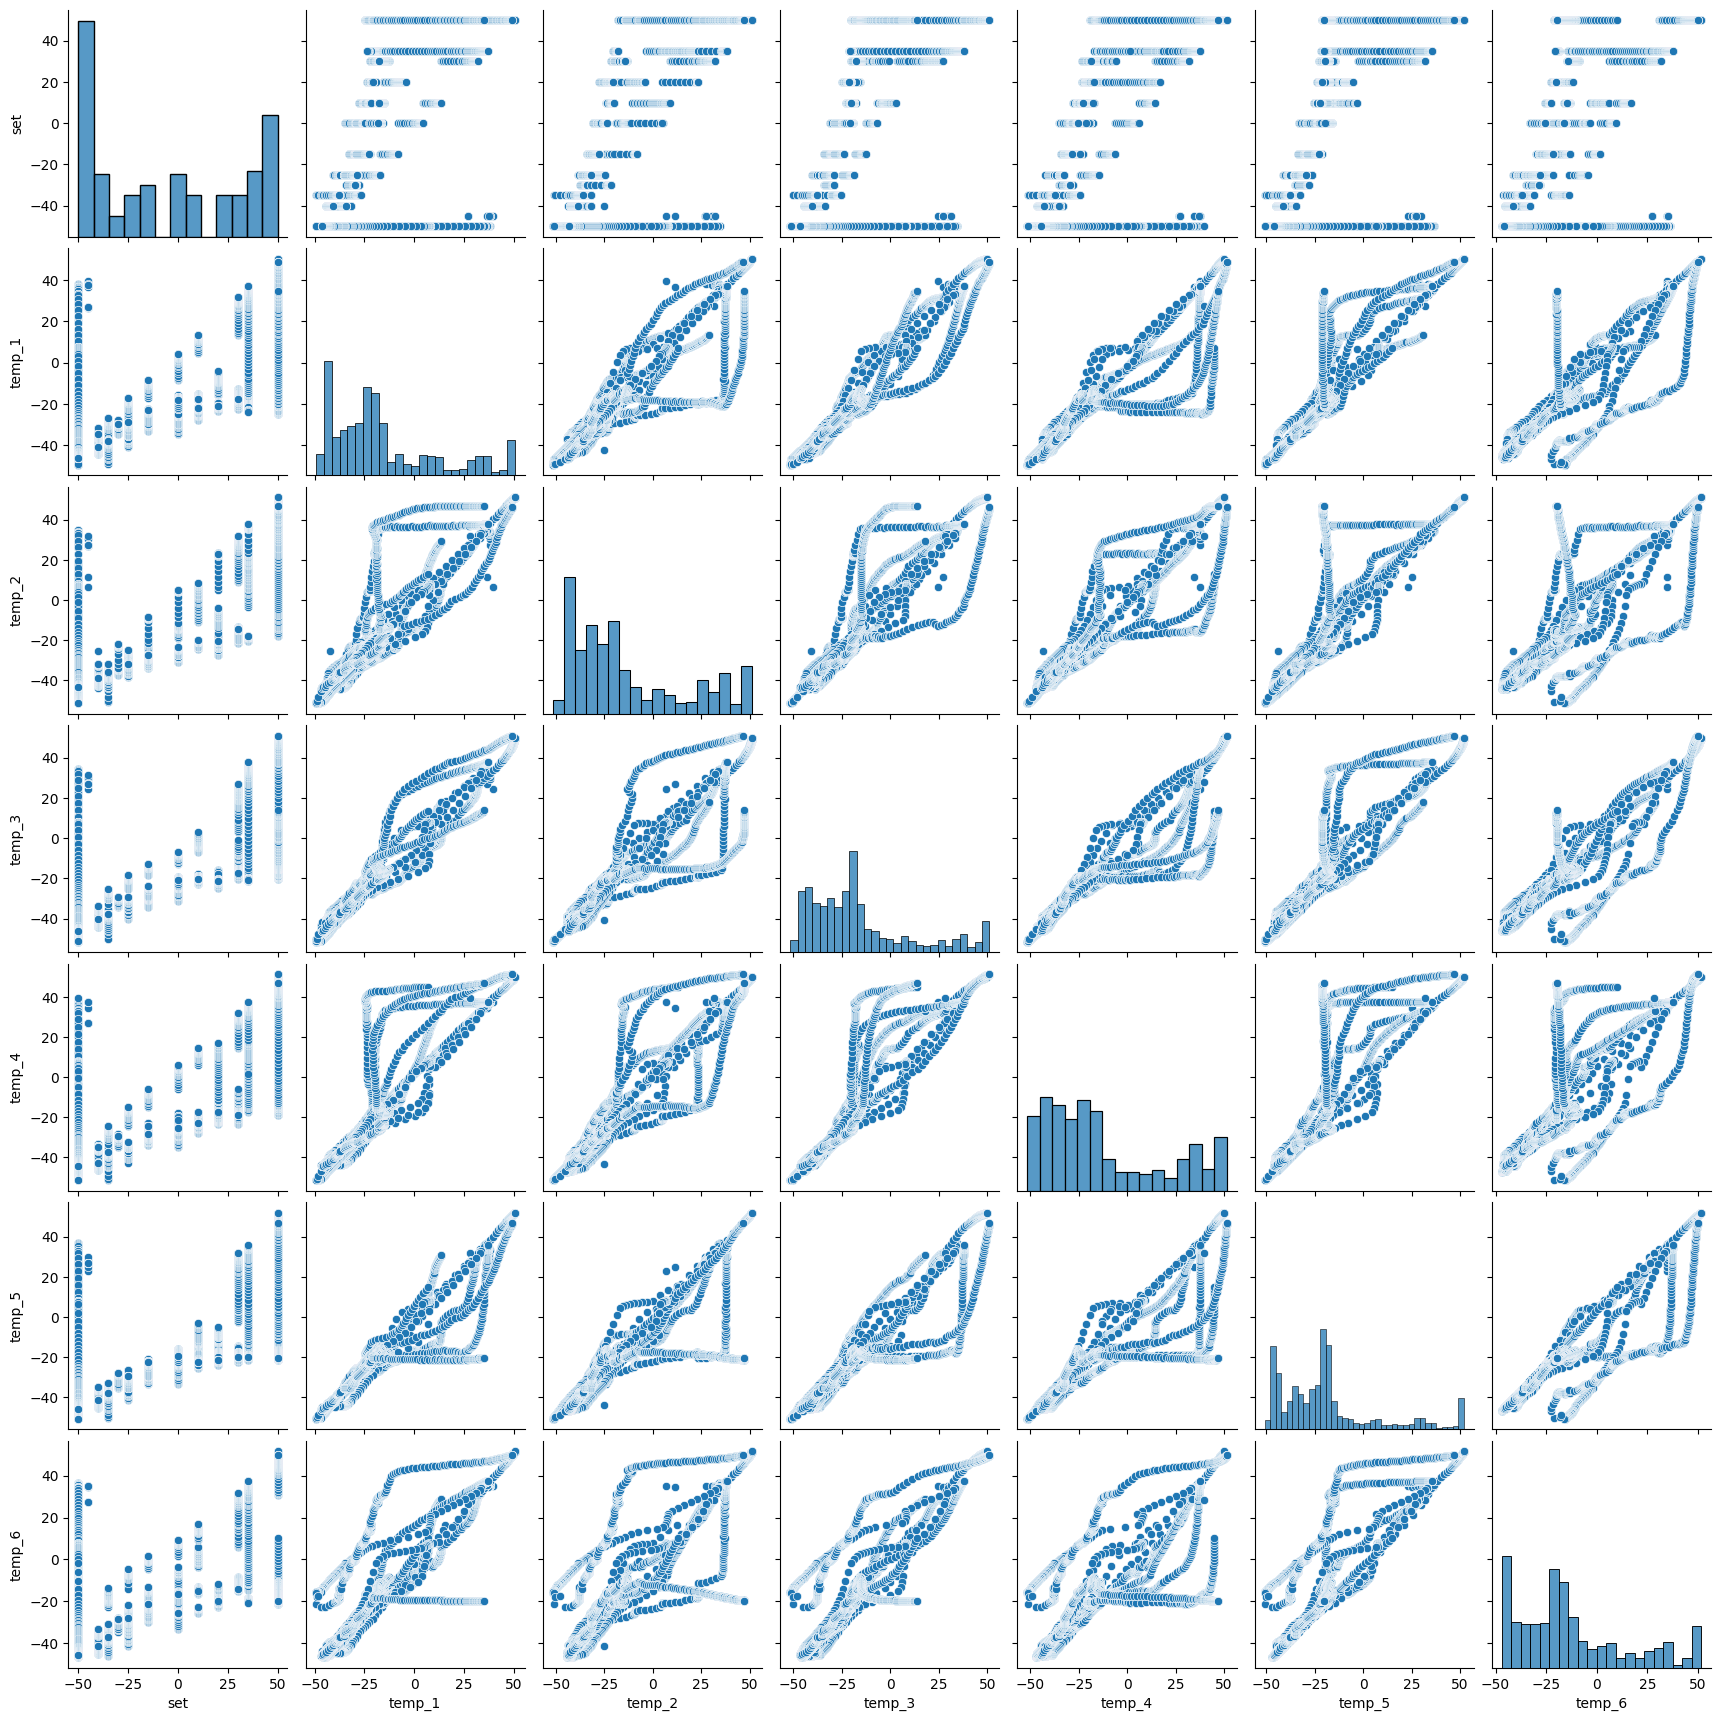

In [19]:
sns.pairplot(df[['set', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temp_6']])
plt.show()

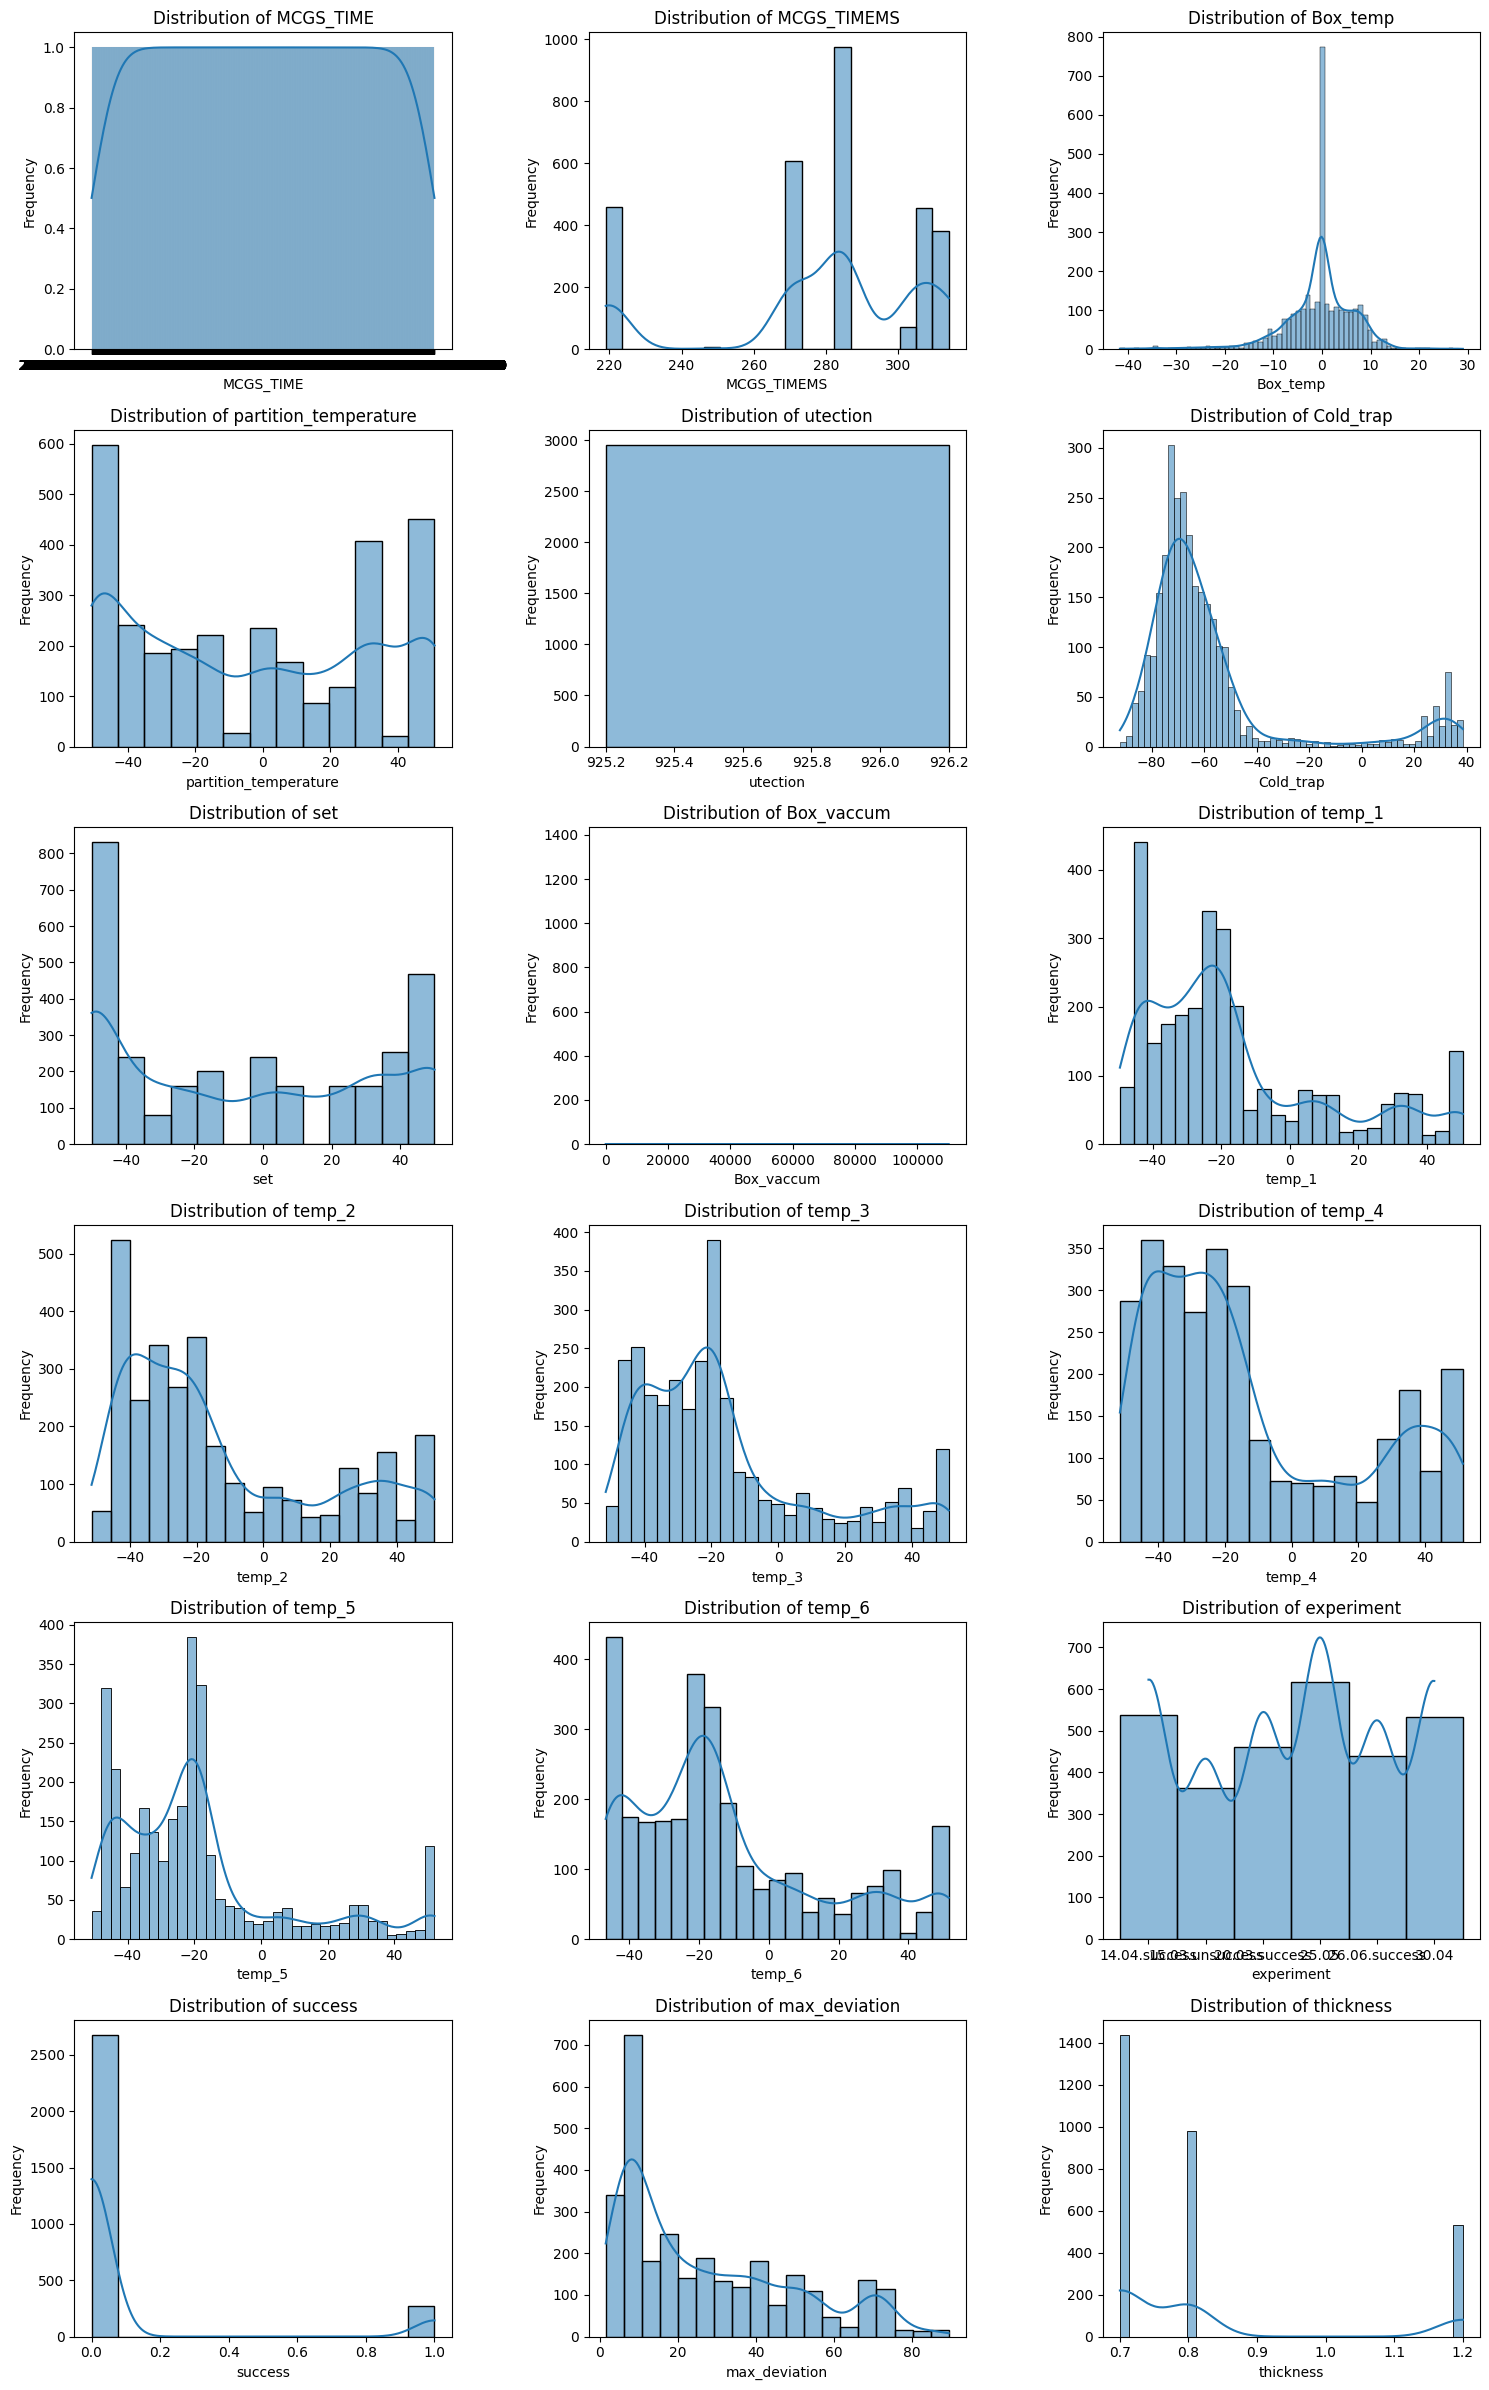

In [20]:
import math
num_columns = len(df.columns)
ncols = 3
nrows = math.ceil(num_columns / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten() 

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


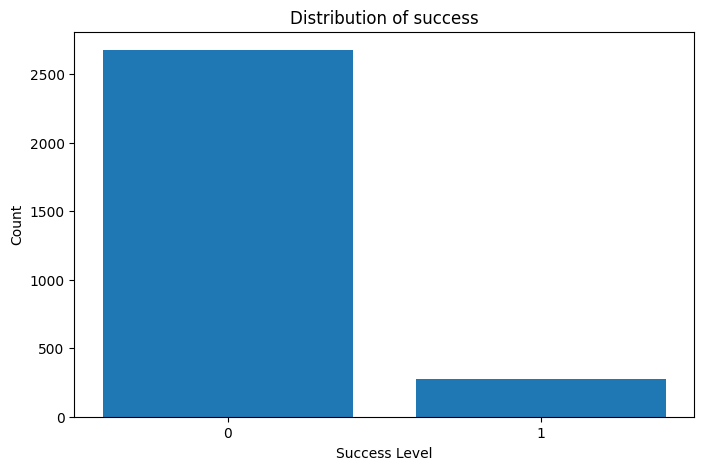

In [21]:
success = ['0', '1']
success_counts = df['success'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(success, success_counts)
plt.xlabel("Success Level")
plt.ylabel("Count")
plt.title("Distribution of success")
plt.show()

## Data Preprocessing for Modeling


In [22]:
df['MCGS_TIME'] = pd.to_datetime(df['MCGS_TIME'], format='mixed', dayfirst=True, errors='coerce')
df['MCGS_TIME'] = df['MCGS_TIME'].dt.time
df['MCGS_TIME'] = df['MCGS_TIME'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [23]:
df = df.drop(columns=['MCGS_TIMEMS', 'experiment', 'utection', 'max_deviation'])

In [24]:
X = df.drop(columns=['success', 'Box_vaccum', 'Cold_trap', 'Box_temp'], axis=1)
y = df['success']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

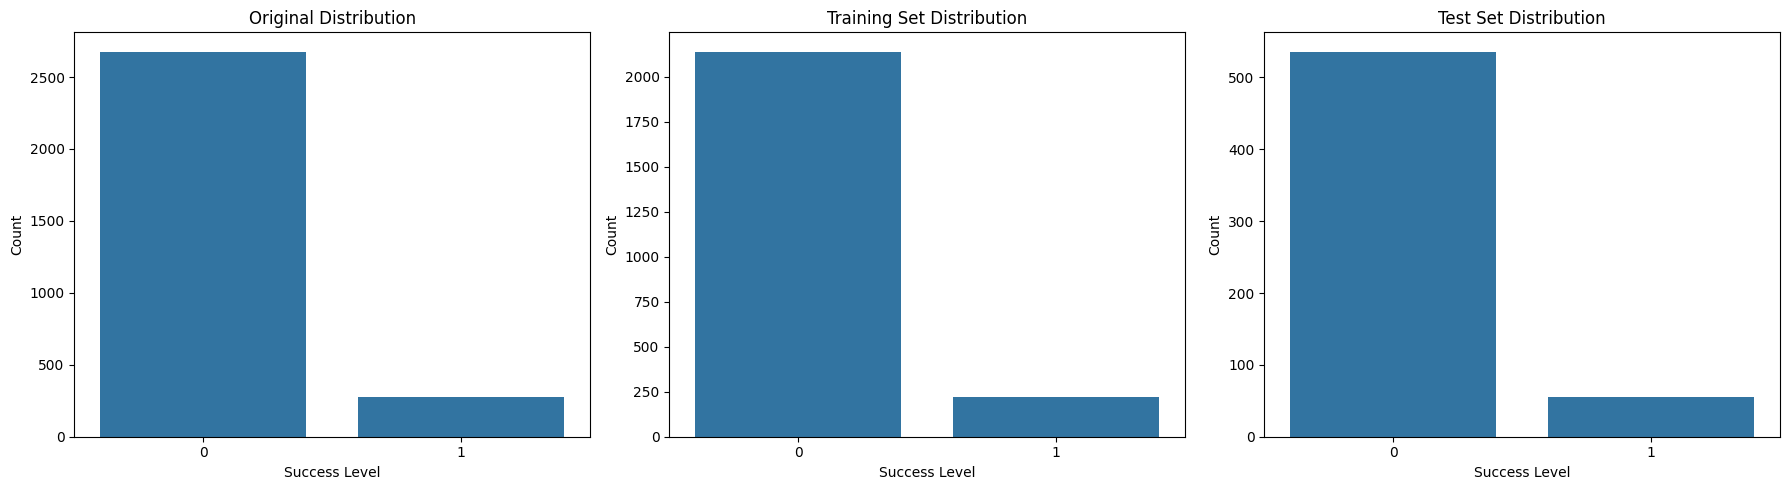

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Original Distribution")
axes[0].set_xlabel("Success Level")
axes[0].set_ylabel("Count")

sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title("Training Set Distribution")
axes[1].set_xlabel("Success Level")
axes[1].set_ylabel("Count")

sns.countplot(x=y_test, ax=axes[2])
axes[2].set_title("Test Set Distribution")
axes[2].set_xlabel("Success Level")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [26]:
lr_clf = LogisticRegression(random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'libliner', 'saga']
}
grid_lr = GridSearchCV(lr_clf, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_lr.best_score_))

C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: C

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.9458


C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: C

In [27]:
best_lr = LogisticRegression(**grid_lr.best_params_)
best_lr.fit(X_train, y_train)

C:\Users\Adilet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [28]:
tree_clf = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [None, 3, 5, 7, 10],
                   'min_samples_split': [2, 5, 10]}
grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_tree.best_score_))

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best cross-validation score: 0.9941


In [29]:
best_tree = DecisionTreeClassifier(**grid_tree.best_params_)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 5, 10, 15]}
grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_rf.best_score_))

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best cross-validation score: 0.9932


In [31]:
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
param_grid_xgb = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 0.2]}
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_xgb.best_score_))

Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Best cross-validation score: 0.9941


In [33]:
best_xgb = XGBClassifier(**grid_xgb.best_params_)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Logistic Regression Evaluation
Accuracy: 0.9188


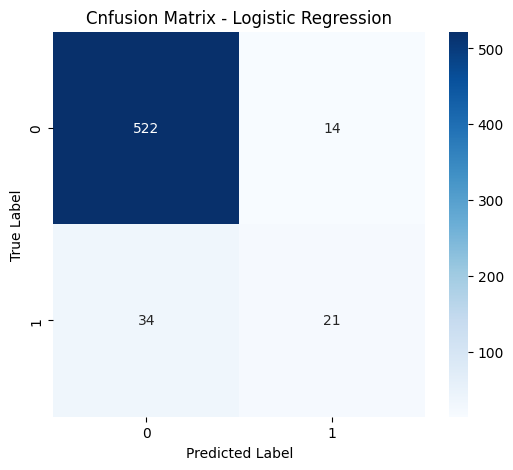

Decision Tree Evaluation:
Accuracy: 0.9898


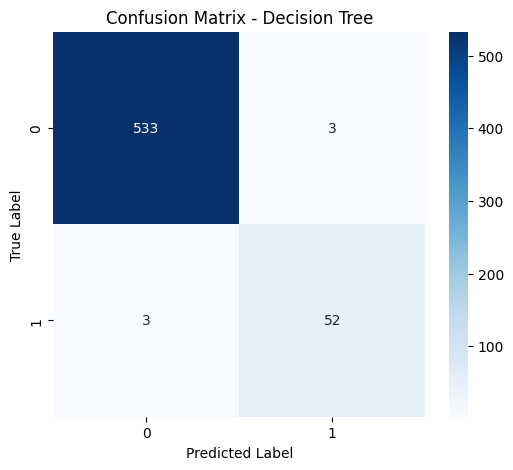

Random Forest Evaluation:
Accuracy: 0.9915


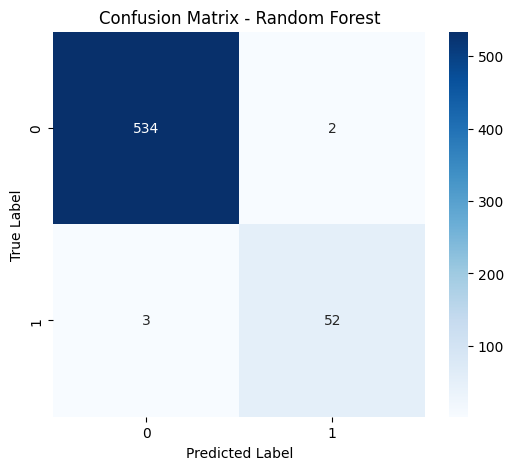

XGBoost Evaluation:
Accuracy: 0.9932


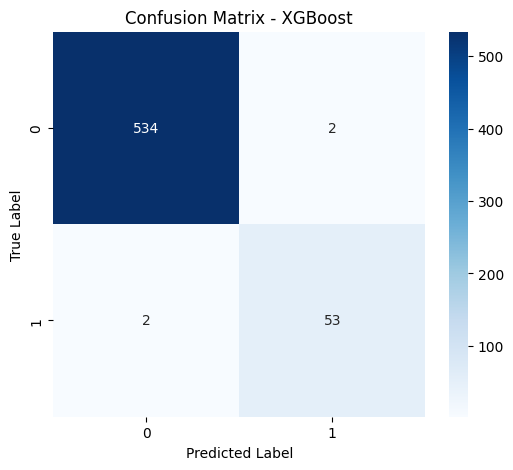

<Figure size 640x480 with 0 Axes>

In [61]:
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Logistic Regression
print("Logistic Regression Evaluation")
y_pred_lr = best_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: {:.4f}".format(acc_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
plot_conf_matrix(cm_lr, "Cnfusion Matrix - Logistic Regression")

# Decision Tree  
print("Decision Tree Evaluation:")
y_pred_tree = best_tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy: {:.4f}".format(acc_tree))
cm_tree = confusion_matrix(y_test, y_pred_tree)
plot_conf_matrix(cm_tree, "Confusion Matrix - Decision Tree")

# Random Forest
print("Random Forest Evaluation:")
y_pred_rf = best_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.4f}".format(acc_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_conf_matrix(cm_rf, "Confusion Matrix - Random Forest")

# XGBoost
print("XGBoost Evaluation:")
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.4f}".format(acc_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_conf_matrix(cm_xgb, "Confusion Matrix - XGBoost")
plt.savefig('./figures/Confusion_Matrix.png', dpi=600)
plt.show()

In [35]:
print("Classification Report Train:\n", classification_report(y_test, y_pred_xgb))

Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       0.96      0.96      0.96        55

    accuracy                           0.99       591
   macro avg       0.98      0.98      0.98       591
weighted avg       0.99      0.99      0.99       591



In [36]:
models_predictions = {
    'Logistic Regression': y_pred_lr,
    'Random Forest:': y_pred_rf,
    'Decision Tree:': y_pred_tree,
    'XGBoost:': y_pred_xgb
}


metrics = {}

for name, y_pred in models_predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics[name] = {'Accurecy': acc, 'Precision:': prec, 'Recall:': rec, 'f1:': f1}

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                     Accurecy  Precision:   Recall:       f1:
Logistic Regression  0.918782    0.600000  0.381818  0.466667
Random Forest:       0.991540    0.962963  0.945455  0.954128
Decision Tree:       0.989848    0.945455  0.945455  0.945455
XGBoost:             0.993232    0.963636  0.963636  0.963636


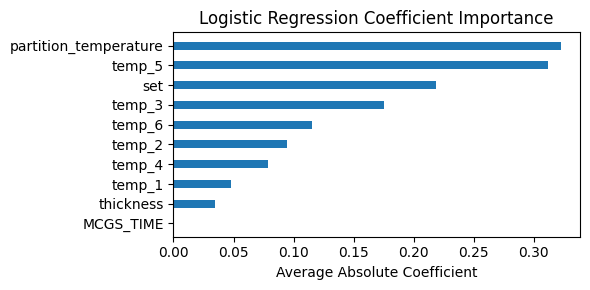

In [37]:
import numpy as np
features = X_train.columns

# --- Logistic Regression Coefficients ---
coefs_lr = grid_lr.best_estimator_.coef_
avg_abs_coefs = np.mean(np.abs(coefs_lr), axis=0)
indices_lr = np.argsort(avg_abs_coefs)

plt.figure(figsize=(6, 3))
plt.title("Logistic Regression Coefficient Importance")
plt.barh(range(len(avg_abs_coefs)), avg_abs_coefs[indices_lr], align='center', height=0.4)
plt.yticks(range(len(avg_abs_coefs)), [features[i] for i in indices_lr])
plt.xlabel("Average Absolute Coefficient")
plt.grid(False)
plt.tight_layout()
plt.show()

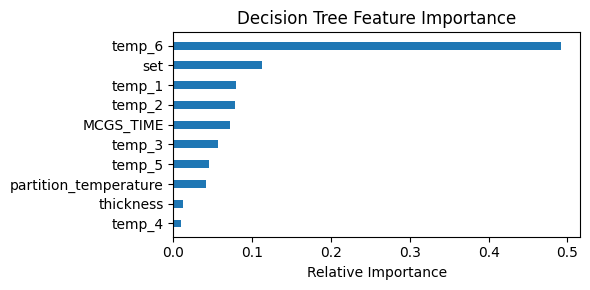

In [38]:
import numpy as np
# --- Decision Tree Feature Importance ---
features = X_train.columns

importances_tree = grid_tree.best_estimator_.feature_importances_
indices_tree = np.argsort(importances_tree)

plt.figure(figsize=(6, 3))
plt.title("Decision Tree Feature Importance")
plt.barh(range(len(importances_tree)), importances_tree[indices_tree], align='center', height=0.4)
plt.yticks(range(len(importances_tree)), [features[i] for i in indices_tree])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.grid(False)
plt.show()

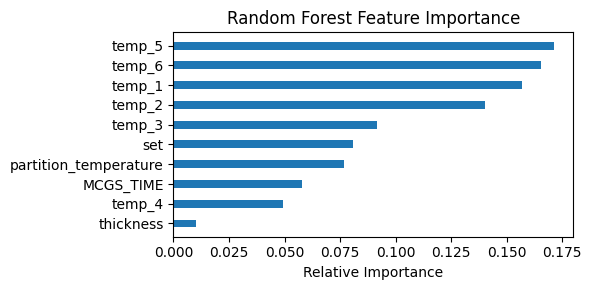

In [39]:
importances_rf = grid_rf.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(6, 3))
plt.title("Random Forest Feature Importance")
plt.barh(range(len(importances_rf)), importances_rf[indices_rf], align='center', height=0.4)
plt.yticks(range(len(importances_rf)), [features[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.grid(False)
plt.show()

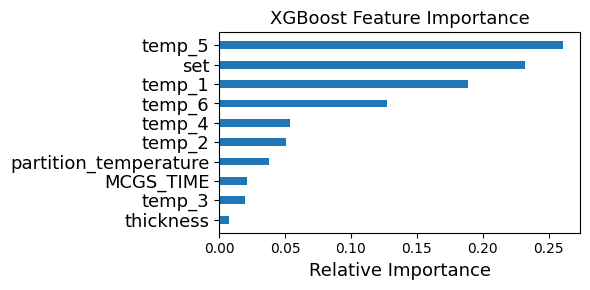

In [69]:
# --- XGBoost Feature Importance ---
importances_xgb = grid_xgb.best_estimator_.feature_importances_
indices_xgb = np.argsort(importances_xgb)

plt.figure(figsize=(6,3))
plt.title("XGBoost Feature Importance", fontsize=13)
plt.barh(range(len(importances_xgb)), importances_xgb[indices_xgb], align='center', height=0.4)
plt.yticks(range(len(importances_xgb)), [features[i] for i in indices_xgb], fontsize=13)
plt.xlabel("Relative Importance", fontsize=13)
plt.tight_layout()
plt.grid(False)
plt.savefig('./figures/Feature_Importance.png', dpi=700)
plt.show()

0.9996607869742198


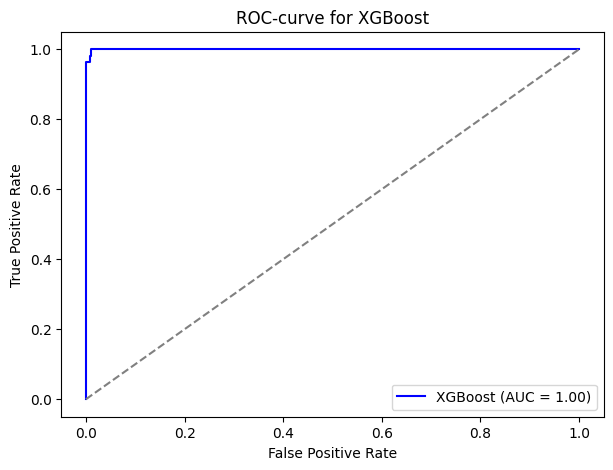

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предсказанные вероятности для XGBoost
y_probs = best_xgb.predict_proba(X_test)[:, 1]  

# Вычисление ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Визуализация
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for XGBoost')
plt.legend()
plt.show()


0.9996099050203527


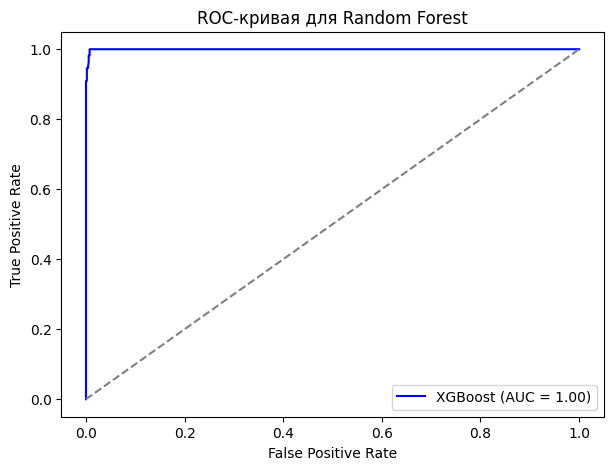

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предсказанные вероятности для XGBoost
y_probs = best_rf.predict_proba(X_test)[:, 1]  

# Вычисление ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Визуализация
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Random Forest')
plt.legend()
plt.show()


0.8292740841248305


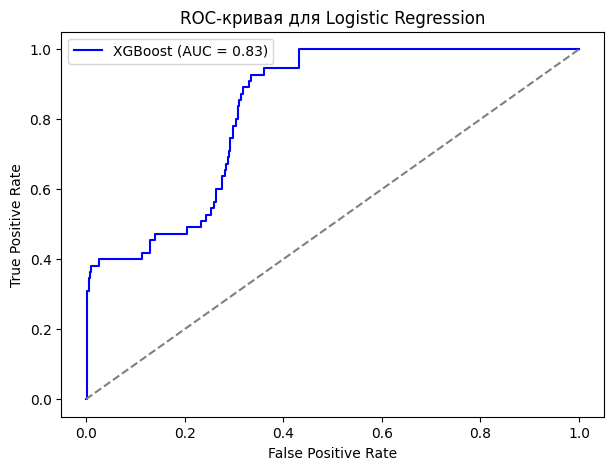

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предсказанные вероятности для XGBoost
y_probs = best_lr.predict_proba(X_test)[:, 1]  

# Вычисление ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Визуализация
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Logistic Regression')
plt.legend()
plt.show()


0.9699287652645862


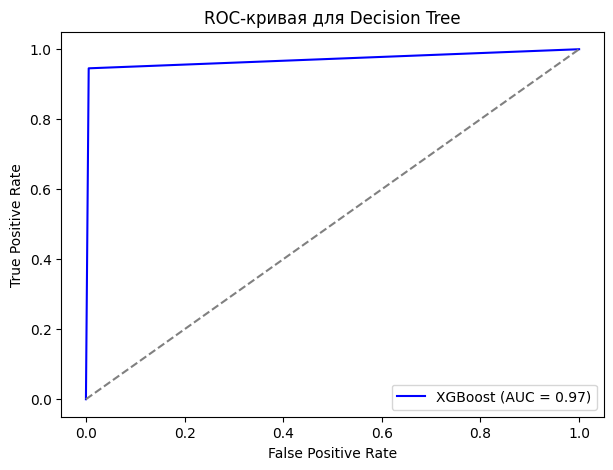

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предсказанные вероятности для XGBoost
y_probs = best_tree.predict_proba(X_test)[:, 1]  

# Вычисление ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Визуализация
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Decision Tree')
plt.legend()
plt.show()


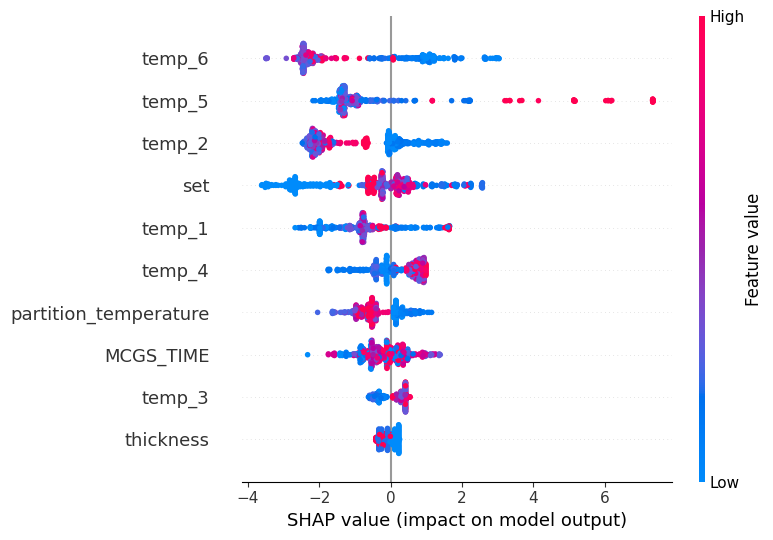

In [45]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [46]:
explainer = shap.Explainer(best_xgb, X)  # Создаем объяснитель
shap_values = explainer(X)  # Получаем значения SHAP для каждого признака


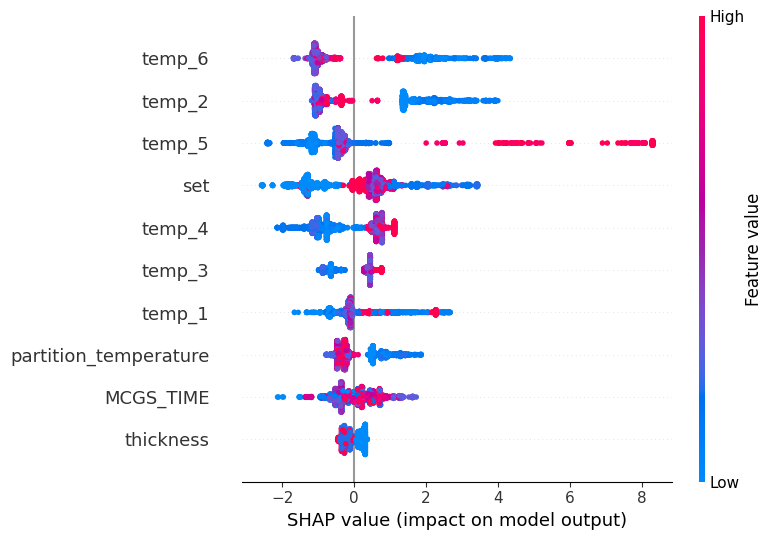

In [47]:
shap.summary_plot(shap_values, X)


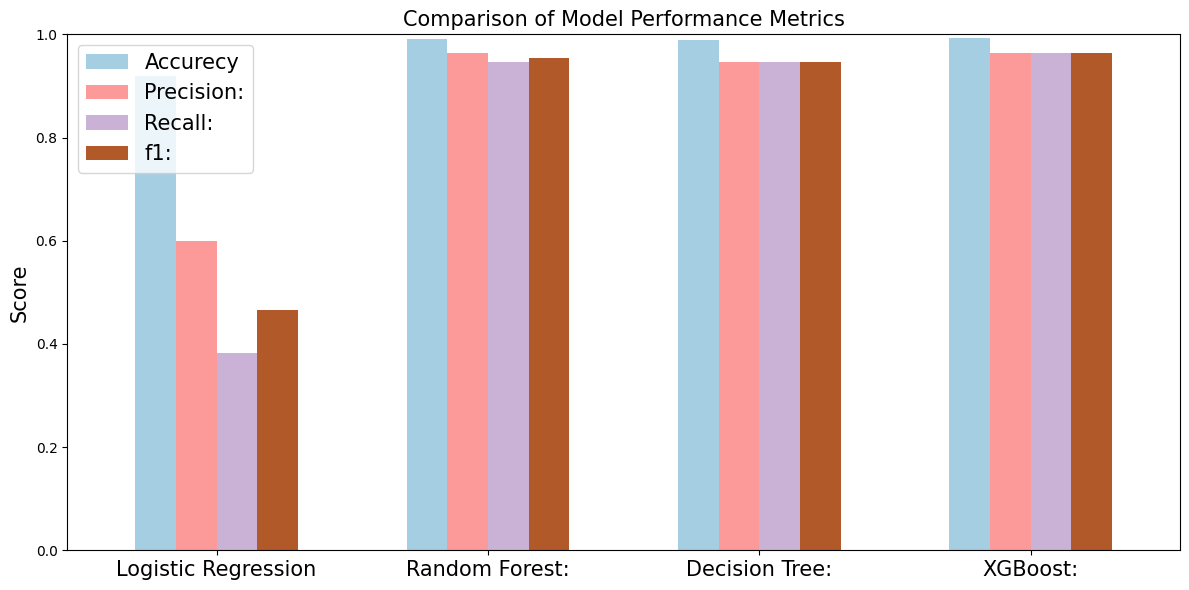

In [66]:
ax = metrics_df.plot(kind='bar', figsize=(12, 6), width=0.6, colormap='Paired')
plt.title("Comparison of Model Performance Metrics", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.ylim(0, 1)
plt.xticks(rotation=0, fontsize=15)  
plt.legend(loc='best', fontsize=15)
plt.tight_layout()
plt.savefig("./figures/bar.png", dpi = 700)
plt.show()


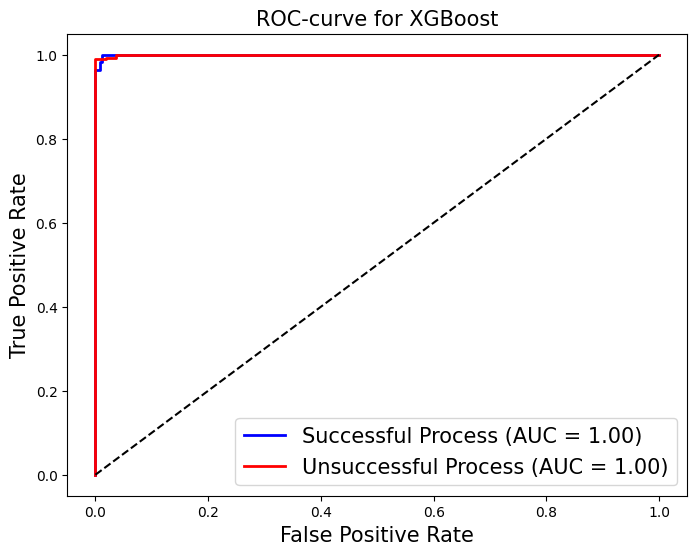

In [67]:
y_probs = best_xgb.predict_proba(X_test)  # shape: (samples, 2) - вероятность классов 0 и 1

# Вычисление ROC-кривой для класса 1 (успешный процесс)
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc_1 = auc(fpr_1, tpr_1)

# Вычисление ROC-кривой для класса 0 (неуспешный процесс)
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs[:, 0])  # Инверсия для класса 0
roc_auc_0 = auc(fpr_0, tpr_0)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Successful Process (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_0, tpr_0, color='red', lw=2, label=f'Unsuccessful Process (AUC = {roc_auc_0:.2f})')

# Линия случайного угадывания
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Подписи осей и заголовок
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title("ROC-curve for XGBoost", fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.savefig("./figures/ROC.png", dpi=700)
plt.show()


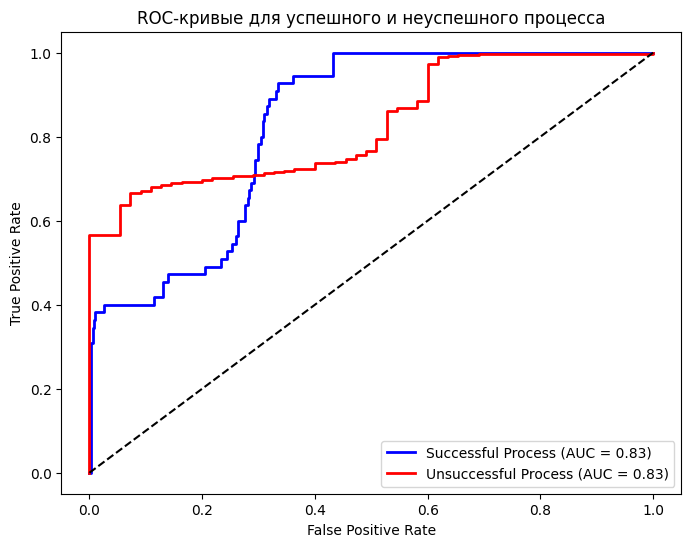

In [ ]:
y_probs = best_lr.predict_proba(X_test)  # shape: (samples, 2) - вероятность классов 0 и 1

# Вычисление ROC-кривой для класса 1 (успешный процесс)
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc_1 = auc(fpr_1, tpr_1)

# Вычисление ROC-кривой для класса 0 (неуспешный процесс)
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs[:, 0])  # Инверсия для класса 0
roc_auc_0 = auc(fpr_0, tpr_0)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Successful Process (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_0, tpr_0, color='red', lw=2, label=f'Unsuccessful Process (AUC = {roc_auc_0:.2f})')

# Линия случайного угадывания
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Подписи осей и заголовок
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые для успешного и неуспешного процесса")
plt.legend(loc="lower right")
plt.show()

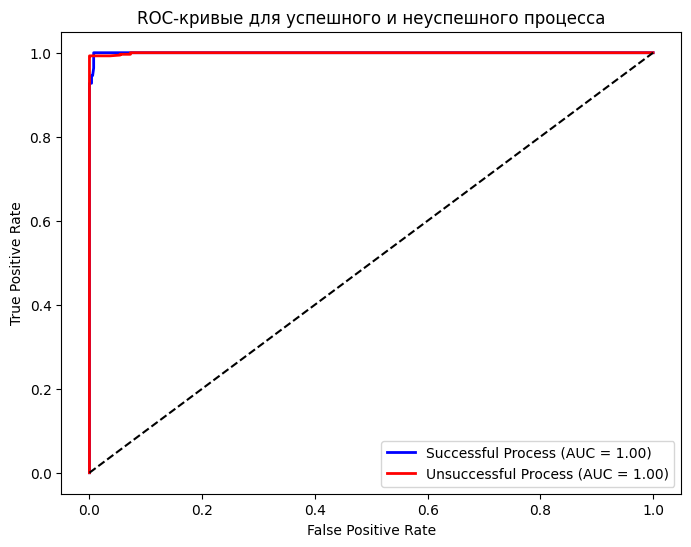

In [ ]:
y_probs = best_rf.predict_proba(X_test)  # shape: (samples, 2) - вероятность классов 0 и 1

# Вычисление ROC-кривой для класса 1 (успешный процесс)
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc_1 = auc(fpr_1, tpr_1)

# Вычисление ROC-кривой для класса 0 (неуспешный процесс)
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs[:, 0])  # Инверсия для класса 0
roc_auc_0 = auc(fpr_0, tpr_0)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Successful Process (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_0, tpr_0, color='red', lw=2, label=f'Unsuccessful Process (AUC = {roc_auc_0:.2f})')

# Линия случайного угадывания
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Подписи осей и заголовок
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые для успешного и неуспешного процесса")
plt.legend(loc="lower right")
plt.show()

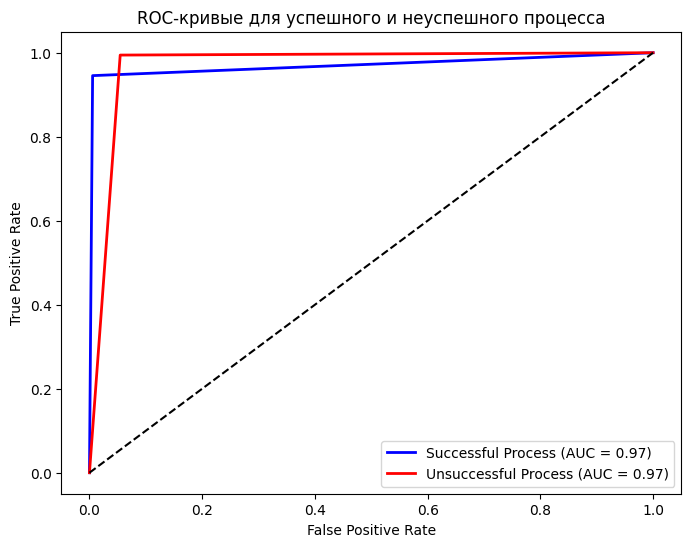

In [ ]:
y_probs = best_tree.predict_proba(X_test)  # shape: (samples, 2) - вероятность классов 0 и 1

# Вычисление ROC-кривой для класса 1 (успешный процесс)
fpr_1, tpr_1, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc_1 = auc(fpr_1, tpr_1)

# Вычисление ROC-кривой для класса 0 (неуспешный процесс)
fpr_0, tpr_0, _ = roc_curve(1 - y_test, y_probs[:, 0])  # Инверсия для класса 0
roc_auc_0 = auc(fpr_0, tpr_0)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))

plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Successful Process (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_0, tpr_0, color='red', lw=2, label=f'Unsuccessful Process (AUC = {roc_auc_0:.2f})')

# Линия случайного угадывания
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Подписи осей и заголовок
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые для успешного и неуспешного процесса")
plt.legend(loc="lower right")
plt.show()

XGBoost Evaluation:
Accuracy: 0.9932


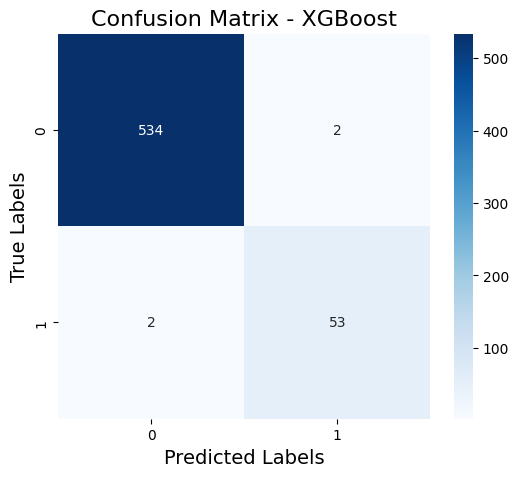

In [74]:
print("XGBoost Evaluation:")
y_pred_xgb = best_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.4f}".format(acc_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))  # Размер графика
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.title("Confusion Matrix - XGBoost", fontsize=16)
plt.savefig('./figures/Confusion_Matrix.png', dpi=600)
plt.show()